게임 회사의 데이터 팀에 합류했습니다.

# **다음 분기에 어떤 게임을 설계해야 할까**

 발표를 듣는 사람은 비데이터 직군


**[Feature]**

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

**[Keyword]**

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, **Cluster**

**[Problem]**

###**지역**에 따라서 선호하는 **게임 장르**가 다를까

###**연도별 게임**의 **트렌드**가 있을까 

###**출고량이 높은 게임**에 대한 **분석 및 시각화 프로세스**가 포함

#**EDA**

In [2]:
from google.colab import files
myfile= files.upload()

Saving vgames2.csv to vgames2.csv


In [31]:
import pandas as pd

df_origin=pd.read_csv("vgames2.csv")
print(df_origin.shape)
df_origin.head()

(16598, 10)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


###[참고]

---
####**[특이사항]**

#####-인덱스
* 중복

#####-NaN값
* 년도,장르,퍼블리셔
* 271,50,58

#####-이름중복 체크
* 5105개
* 같은해 플랫폼만 다르게 출시되는경우가 있음.


#####-년도
* 어째선지 float
* 0~20년도가 그냥숫자로 써져있음
* 80~90년대도 마찬가지


#####-sales
* 전부스트링값 ->   toint 와 try except로 기본값들 싹 바꾸고 안된놈들은 또 따로.
* k,K와 m,M




---
####**[컬럼스]**


#####-플랫폼종류
* ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


#####-장르
* ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]

#####-퍼블리셔 
* 그냥 많음

---

###EDA코드

####함수 정의

In [32]:
#Years 형식 변경
import math
def toint(a):
  if math.isnan(a):
    return a
  elif a <=30:
    return int(a+2000)
  elif a<100:
    return int(a+1900)
  else:
    return int(a)

In [33]:
#sales 형식 변경
import numpy as np
def tofloat(a):
  if type(a)==float:
    return a
  elif 'm' in a:
    return float(a.replace('m',''))
  elif 'M' in a:
    return float(a.replace('M',''))
  elif 'k' in a:
    return float(a.replace('k',''))/1000
  elif 'K' in a:
    return float(a.replace('K',''))/1000
  else:
    return float(a)

In [34]:
#결과 출력
def EDAing(dfa):
  #Year value
  Ys=dfa['Year'].apply(toint)
  #Sales value
  sales=dfa.iloc[:,-4:]
  for i in sales:
    sales[i]=dfa[i].apply(tofloat)
  #Resul
  refind=dfa.copy()
  refind.iloc[:,-4:]=sales
  refind['Year']=Ys
  return refind

####데이터 분리

In [35]:
#1. 인덱스 중복제거
df_edit_A=df_origin.drop(df_origin.iloc[:,0:1],axis=1)
#체크
print(df_edit_A.shape)
df_edit_A.head()

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [36]:
#2. 결측치 분리

def tobool(a):
  return bool(a)
b=df_edit_A.isnull().sum(axis=1)
b=b.apply(tobool)
df_NUL=df_edit_A[b]

#전부제거
df_edit=df_edit_A.dropna()
'''
#하나만 제거
df_edit_Yx=df_edit_A.dropna(subset=['Year'])
df_edit_Gx=df_edit_A.dropna(subset=['Genre'])
df_edit_Px=df_edit_A.dropna(subset=['Publisher'])

#하나만 남김
df_edit_Yo=df_edit_A.dropna(subset=['Genre','Publisher'])
df_edit_Go=df_edit_A.dropna(subset=['Year','Publisher'])
df_edit_Po=df_edit_A.dropna(subset=['Year','Genre'])
'''
#체크
print(df_edit.shape)
df_edit.head()

(16241, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [37]:
#결측덩어리
df_refind_NUL=EDAing(df_NUL)

#결측치 제거 X
df_refind_A=EDAing(df_edit_A)
'''
#결측치 하나만 제거
df_refind_Yx=EDAing(df_edit_Yx)
df_refind_Gx=EDAing(df_edit_Gx)
df_refind_Px=EDAing(df_edit_Px)

#결측지 하나만 남김

df_refind_Yo=EDAing(df_edit_Yo)
df_refind_Go=EDAing(df_edit_Go)
df_refind_Po=EDAing(df_edit_Po)
'''
#결측치 전부제거
df_refind=EDAing(df_edit)
print(df_refind.shape)
df_refind.head()

(16241, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


#DATA 처리

####함수정의

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
#요약 함수
def summary_data(xx,col,Yearcount=False):
  data=xx.copy()
  data['count']=1
  d=data.groupby(data[col]).sum().iloc[:,1:]
  if Yearcount==1:
    d['Year_min']=data.groupby(data[col]).min()['Year']
    d['Year_max']=data.groupby(data[col]).max()['Year']
    d['Active_year']=d['Year_max']-d['Year_min']+1
    d['Publish/Y']=round(d['count']/d['Active_year'],1)
    d=d.sort_values(by=['Year_min','Year_max'], axis=0)
  return d
#요약 P, G
def summary_data_PG(xx):
  data=xx.copy()
  data['count']=1
  d=data.groupby([data['Platform'],data['Genre']]).sum()
  d['Year_min']=data.groupby([data['Platform'],data['Genre']]).min()['Year']
  d['Year_max']=data.groupby([data['Platform'],data['Genre']]).max()['Year']
  d['Active_year']=d['Year_max']-d['Year_min']+1
  d['Publish/Y']=round(d['count']/d['Active_year'],1)
  d=d.sort_values(by=['Year_min','Year_max'], axis=0)
  return d
#랭킹 매기는 함수
def rankX(data,col,top_num,notascending=False):
  return data.sort_values(by=[col], ascending=notascending,axis=0)[col].head(top_num)

####1차진행

In [39]:
print(df_refind['Year'].min(),df_refind[df_refind['Year']<2020]['Year'].max())
print("총 37년간 데이터")

1980 2017
총 37년간 데이터


In [40]:
#남은 오류값 제거
df_refind=df_refind[df_refind.index!=8742]
df_refind=df_refind[df_refind['Year']!=2020]
#정리
Plat_d=summary_data(df_refind,'Platform',Yearcount=True)
PG_d=summary_data_PG(df_refind)
print(len(Plat_d))
Plat_d.head()

31


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,count,Year_min,Year_max,Active_year,Publish/Y
Platform,,,,,,,,,
2600,80.32,4.83,0.00,0.83,115,1980,1989,10,11.5
NES,125.94,21.15,98.65,5.31,98,1983,1994,12,8.2
PC,92.03,136.51,0.17,24.24,935,1985,2016,32,29.2
GB,113.64,47.51,85.12,8.16,97,1988,2001,14,6.9
GEN,19.27,5.52,2.67,0.89,27,1990,1994,5,5.4


In [41]:
PG_d.head()

Year  NA_Sales  ...  Active_year  Publish/Y
Platform Genre                         ...                        
2600     Fighting      1980      0.72  ...            1        1.0
         Misc          9902      3.34  ...            3        1.7
         Shooter      43611     21.41  ...            9        2.4
         Action      109013     24.63  ...           10        5.5
         Simulation    1981      0.42  ...            1        1.0

[5 rows x 10 columns]

####결측값체크

In [42]:
#결측값 체크

data=df_refind_NUL.copy()
data['count']=1
d=data.groupby(data['Platform']).sum().iloc[:,1:]
data=data.dropna(subset=['Year'])
data=data.drop({'Genre','Publisher'},axis=1)
d['Year_min']=data.groupby(data['Platform']).min()['Year']
d['Year_max']=data.groupby(data['Platform']).max()['Year']
d['Active_year']=d['Year_max']-d['Year_min']+1
d['Publish/Y']=round(d['count']/d['Active_year'],1)
d=d.sort_values(by=['Year_min','Year_max'], axis=0)
x=round((d['count']/Plat_d['count'])*100)
print(pd.DataFrame(x).dropna())

          count
Platform       
2600       16.0
3DS         2.0
DS          2.0
GB          1.0
GBA         5.0
GC          3.0
N64         2.0
PC          3.0
PS          1.0
PS2         2.0
PS3         2.0
PS4         0.0
PSP         2.0
PSV         1.0
Wii         3.0
X360        3.0
XB          3.0
XOne        0.0


결측값중 2600 제거 비율이 10%이기에 빠진데이터 보강하여 추가

In [43]:
mean_val=int(round(df_refind.groupby(df_refind['Platform']).mean(),0)['Year']['2600'])
df_plus=df_refind_NUL[df_refind_NUL['Platform']=='2600'].fillna(mean_val)
df_plus=df_plus[df_plus.index!=12314]
df_edit_final=pd.concat([df_edit,df_plus])
df_edit_final.index.name='num'
df_edit_final=df_edit_final.sort_values(by=['num'], axis=0)

####재작업

#####플랫폼분석

In [242]:
df_refind=EDAing(df_edit_final)

#남은 오류값 제거
df_refind=df_refind[df_refind.index!=8742]
df_refind=df_refind[df_refind['Year']!=2020]
#정리
Plat_d=summary_data(df_refind,'Platform',Yearcount=True)
PG_d=summary_data_PG(df_refind)
Plat_d[['Year_max','Year_min']].sort_values(by=['Year_max','Year_min'],ascending=False,axis=0).head(5)

,Year_max,Year_min
Platform,,
PS4,2017,2013
PSV,2017,2011
XOne,2016,2013
WiiU,2016,2012
3DS,2016,2011


In [244]:
PG_d['sale']=PG_d.iloc[:,1:5].sum(axis=1)
PG_d.head()

Year  NA_Sales  EU_Sales  ...  Active_year  Publish/Y   sale
Platform Genre                                   ...                               
2600     Fighting      3962      1.16      0.07  ...            3        0.7   1.24
         Misc          9902      3.34      0.20  ...            3        1.7   3.57
         Shooter      47575     24.68      1.51  ...            9        2.7  26.47
         Action      120905     27.39      1.64  ...           10        6.1  29.25
         Simulation    1981      0.42      0.02  ...            1        1.0   0.44

[5 rows x 11 columns]

In [255]:
x=PG_d.loc['PS4'].sort_values(by=['sale'],ascending=False,axis=0).reset_index()
x[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','sale']].head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sale
0,Action,28.70,37.43,5.15,13.42,84.70
1,Shooter,28.02,33.15,2.33,11.82,75.32
2,Sports,18.23,22.88,0.92,8.07,50.10
3,Role-Playing,8.26,10.55,3.23,3.74,25.78
4,Racing,2.47,7.12,0.26,1.72,11.57


In [246]:
x['NAs/c']=round(x['NA_Sales']/x['count'],3)
x['EUs/c']=round(x['EU_Sales']/x['count'],3)
x['JPs/c']=round(x['JP_Sales']/x['count'],3)
x['s/c']=round(x['sale']/x['count'],3)
x=x[x['Genre']!='Platform']
x.sort_values(by=['s/c'],ascending=False,axis=0).drop(['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','count','Year_min','Year_max','Active_year','Publish/Y','sale'],axis=1).head()

,Genre,NAs/c,EUs/c,JPs/c,s/c
1,Shooter,0.824,0.975,0.069,2.215
2,Sports,0.424,0.532,0.021,1.165
0,Action,0.237,0.309,0.043,0.700
4,Racing,0.145,0.419,0.015,0.681
3,Role-Playing,0.176,0.224,0.069,0.549


In [256]:
x=PG_d.loc['3DS'].sort_values(by=['sale'],ascending=False,axis=0).reset_index()
x[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','sale']].head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sale
0,Role-Playing,15.01,8.95,35.24,2.14,61.34
1,Action,19.31,12.33,22.05,2.80,56.49
2,Platform,13.19,10.35,6.45,2.26,32.25
3,Simulation,7.01,7.93,10.32,1.37,26.63
4,Racing,5.98,4.58,2.81,1.06,14.43


In [257]:
x['NAs/c']=round(x['NA_Sales']/x['count'],3)
x['EUs/c']=round(x['EU_Sales']/x['count'],3)
x['JPs/c']=round(x['JP_Sales']/x['count'],3)
x['s/c']=round(x['sale']/x['count'],3)
x=x[x['Genre']!='Platform']
x.sort_values(by=['s/c'],ascending=False,axis=0).drop(['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','count','Year_min','Year_max','Active_year','Publish/Y','sale'],axis=1).head()

,Genre,NAs/c,EUs/c,JPs/c,s/c
4,Racing,0.598,0.458,0.281,1.443
3,Simulation,0.250,0.283,0.369,0.951
6,Fighting,0.316,0.157,0.228,0.746
0,Role-Playing,0.179,0.107,0.420,0.730
1,Action,0.107,0.068,0.122,0.314


In [258]:
x=PG_d.loc['XOne'].sort_values(by=['sale'],ascending=False,axis=0).reset_index()
x[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','sale']].head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sale
0,Shooter,31.78,15.27,0.16,4.38,51.59
1,Action,19.45,11.47,0.05,2.81,33.78
2,Sports,14.26,7.67,0.02,2.03,23.98
3,Role-Playing,5.56,3.06,0.01,0.83,9.46
4,Racing,3.94,4.16,0.05,0.68,8.83


In [259]:
x['NAs/c']=round(x['NA_Sales']/x['count'],3)
x['EUs/c']=round(x['EU_Sales']/x['count'],3)
x['JPs/c']=round(x['JP_Sales']/x['count'],3)
x['s/c']=round(x['sale']/x['count'],3)
x=x[x['Genre']!='Platform']
x.sort_values(by=['s/c'],ascending=False,axis=0).drop(['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','count','Year_min','Year_max','Active_year','Publish/Y','sale'],axis=1).head()

,Genre,NAs/c,EUs/c,JPs/c,s/c
0,Shooter,0.963,0.463,0.005,1.563
3,Role-Playing,0.428,0.235,0.001,0.728
2,Sports,0.396,0.213,0.001,0.666
1,Action,0.286,0.169,0.001,0.497
4,Racing,0.207,0.219,0.003,0.465


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.patches.Wedge at 0x7f3efc733590>,
 [Text(1.0048999936326264, 0.44741032933667013, 'GB'),
  Text(0.4018750800092658, 1.0239611418738244, 'X360'),
  Text(-0.3710630375984634, 1.0355250948809505, 'PSP'),
  Text(-0.9607490494580874, 0.5356876552295953, 'PS2'),
  Text(-1.0759623476026818, -0.22870292202183598, 'NES'),
  Text(-0.6858387274057757, -0.860014674287844, 'DC'),
  Text(-0.01645526950261655, -1.0998769131614665, 'PS3'),
  Text(0.6598041534163961, -0.8801468508916414, 'DS'),
  Text(1.0511301149144743, -0.32423059929606296, 'PS')],
 [Text(0.5481272692541598, 0.24404199782000185, '13.3%'),
  Text(0.21920458909596313, 0.5585242592039041, '11.4%'),
  Text(-0.20239802050825273, 0.5648318699350638, '11.4%'),
  Text(-0.5240449360680476, 0.2921932664888701, '11.4%'),
  Text(-0.5868885532378264, -0.12474704837554687, '11.4%'),
  Text(-0.3740938513122412, -0.4690989132479148, '10.5%'),
  Text(-0.008975601546881753, -0.5999328617244363, '10.5%'),
  Text(0.3598931745907615, -0.480

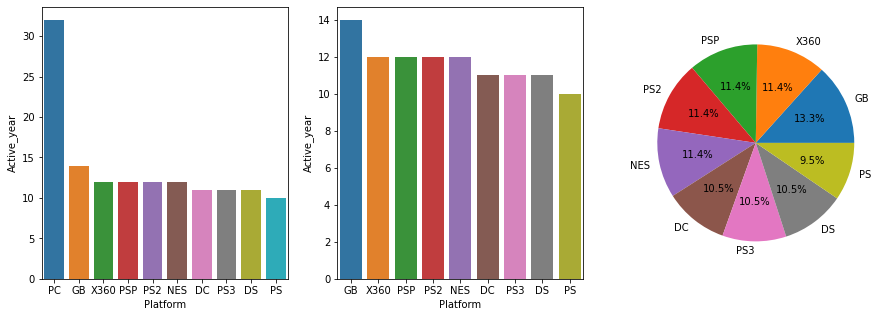

In [95]:
#가장 존속기간이 길었던 플랫폼
x=rankX(Plat_d,'Active_year',10)

plt.rcParams["figure.figsize"] = (15,5)

plt.subplot(1,3,1)
sns.barplot(x.index,x)

plt.subplot(1,3,2)
sns.barplot(x.iloc[1:].index,x.iloc[1:])

plt.subplot(1,3,3)
plt.pie(x.iloc[1:],labels=x.iloc[1:].index, autopct='%.1f%%')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


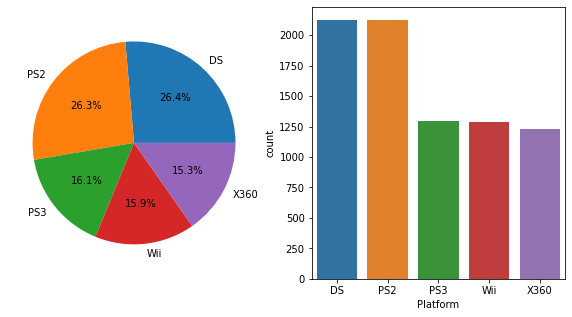

In [94]:
#퍼블리싱 수가 가장 많은 브랜드
x=rankX(Plat_d,'count',5)

plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
plt.pie(x,labels=x.index, autopct='%.1f%%')

plt.subplot(1,2,2)
sns.barplot(x.index,x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


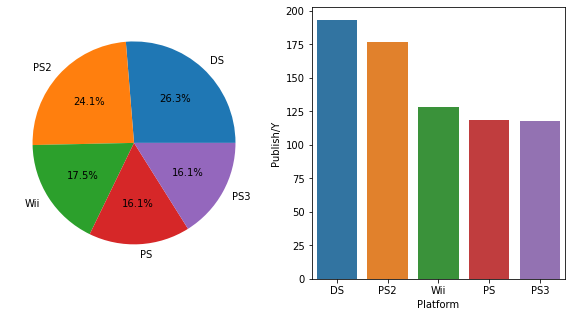

In [92]:
#년당 발행수가 가장많은것
x=rankX(Plat_d,'Publish/Y',5)

plt.subplot(1,2,1)
plt.pie(x,labels=x.index, autopct='%.1f%%')

plt.subplot(1,2,2)
sns.barplot(x.index,x)


In [96]:
for i in range(0,3):
  print(Plat_d.columns[i],Plat_d.iloc[:,i].idxmax(),round(Plat_d.iloc[:,i].max(),3))


#plt.pie(Plat_d.iloc[:,i], labels=Plat_d.iloc[:,i].index, autopct='%.1f%%')


NA_Sales X360 593.78
EU_Sales PS3 339.71
JP_Sales DS 174.95


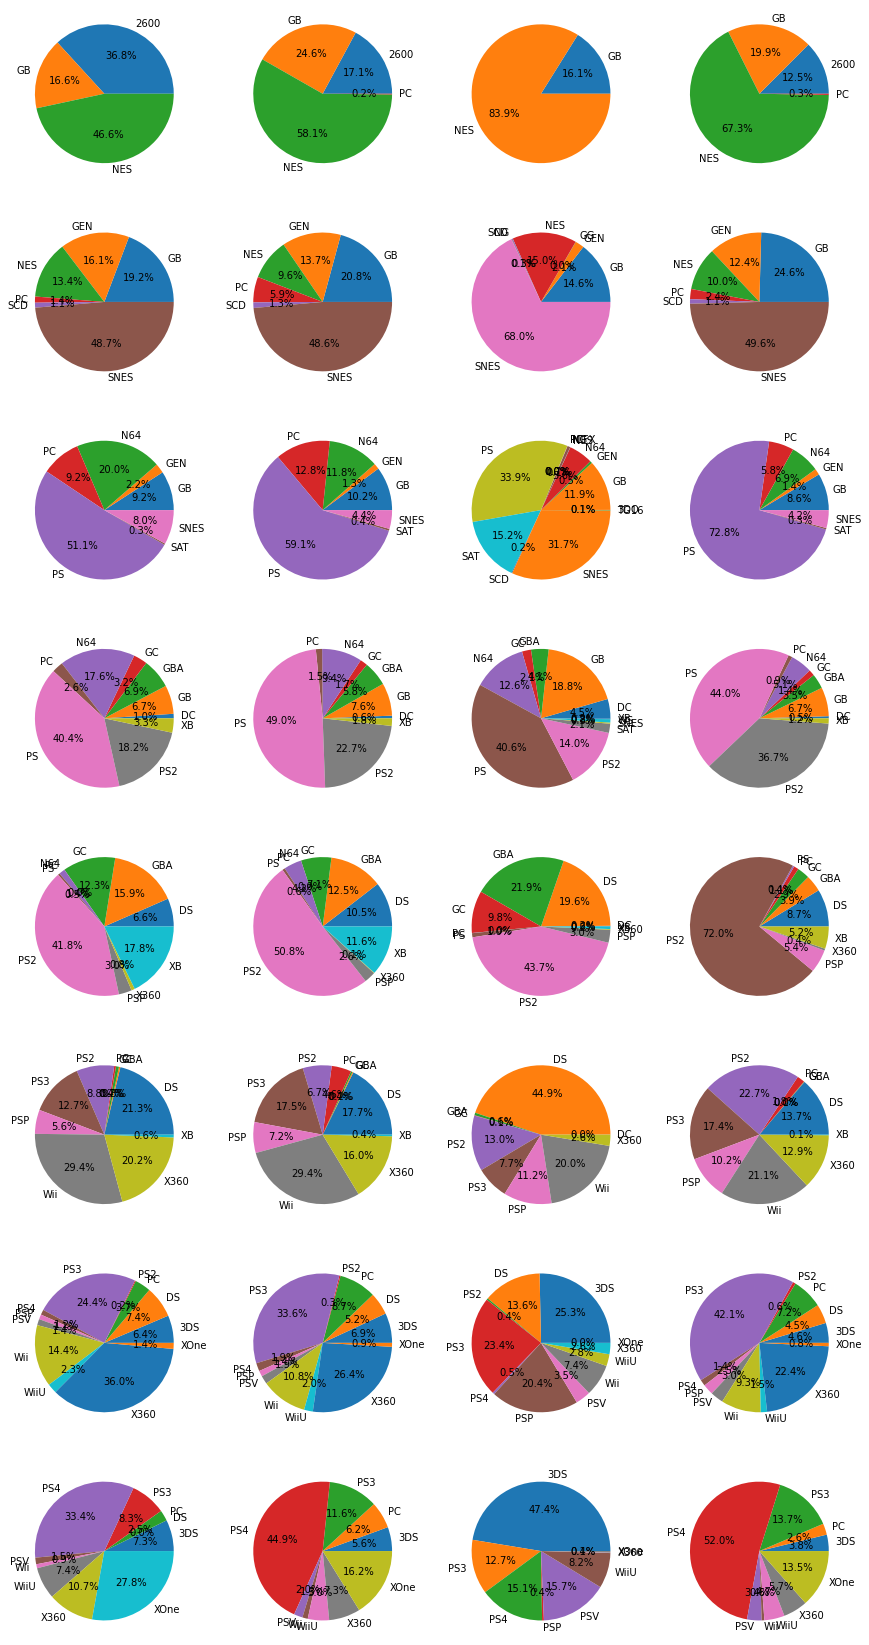

In [86]:
def printpie(data,row_num,count=0):
  for i in range(0,len(data.columns)):
    plt.subplot(row_num,len(data.columns),i+1+count)
    plt.pie(data[data.iloc[:,i]!=0].iloc[:,i], labels=data[data.iloc[:,i]!=0].iloc[:,i].index, autopct='%.1f%%')


plt.rcParams["figure.figsize"] = (15,30)

x=df_refind[df_refind['Year']<1990].groupby(df_refind['Platform']).sum().iloc[:,1:]
printpie(x,8,0)
y=1990
for i in range(0,7):
  x=df_refind[(df_refind['Year']>=y+i*4)&(df_refind['Year']<y+(i+1)*4)].groupby(df_refind['Platform']).sum().iloc[:,1:]
  printpie(x,8,4*(i+1))

#printpie(df_refind[(df_refind['Year']>=2010)&(df_refind['Year']<2020)].groupby(df_refind['Platform']).sum().iloc[:,1:],6,20)

#y=df_refind[df_refind['Year']<1990]
#y[y['Platform']=='PC']

#####장르분석

In [51]:
G_d=summary_data(df_refind,'Genre')
G_d.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,count
Genre,,,,,
Action,861.51,513.81,156.58,184.00,3245
Adventure,103.00,63.74,51.87,16.71,1269
Fighting,220.79,99.93,87.14,36.15,836
Misc,394.73,208.15,104.18,72.64,1681
Platform,445.38,200.63,130.53,51.45,873


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

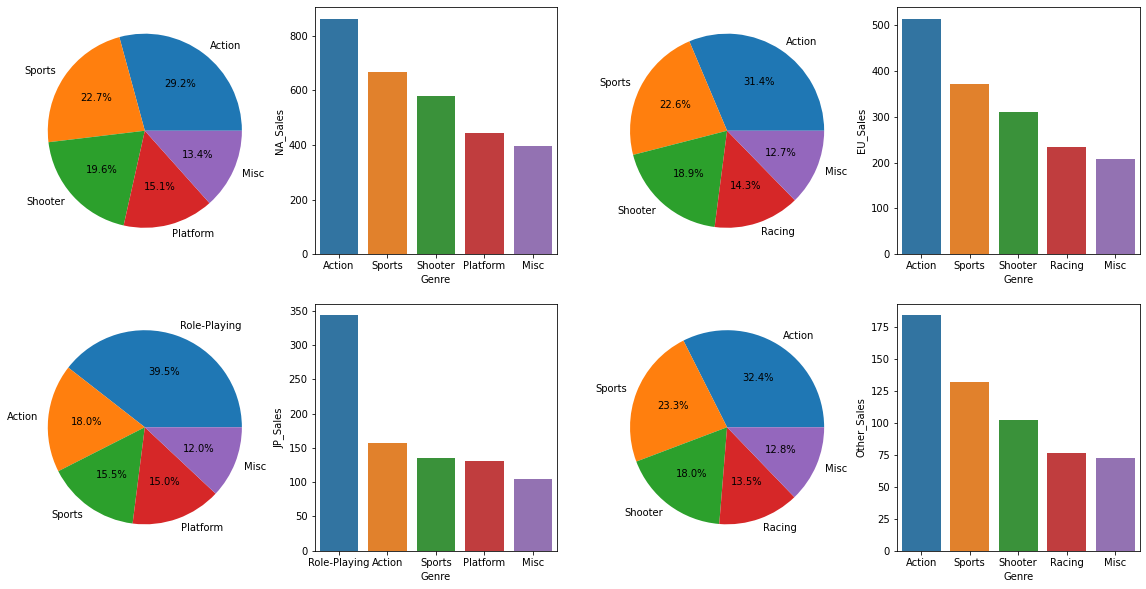

In [52]:
#국가별 선호장르차이
row=(len(G_d.columns)-1)/2
plt.rcParams["figure.figsize"] = (20,5*row)

j=0
for i in G_d.columns:
  if i=='count':
    break
  d=rankX(G_d,i,5)
  plt.subplot(row,4,1+2*j)
  plt.pie(d,labels=d.index, autopct='%.1f%%')
  plt.subplot(row,4,2+2*j)
  sns.barplot(d.index,d)
  j=j+1

#####출고별

In [110]:
df_sale=df_refind.copy()
data=df_sale
data['sale']=data.iloc[:,-4:].sum(axis=1)
data.sort_values(by=['sale'], ascending=False,axis=0).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Years,sale
num,,,,,,,,,,,
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,2006~2010,41.25
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,1994~1998,20.11
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,2006~2010,19.98
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,2006~2010,18.63
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,2006~2010,17.25
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,2002~2006,15.68
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,2002~2006,15.47
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,2006~2010,14.98
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,2010~2014,14.38


In [111]:
#닌텐도 빠진값
df_notNin=df_sale[df_sale['Publisher']!='Nintendo']
data=df_notNin.copy()
data['sale']=data.iloc[:,-4:].sum(axis=1)
data.sort_values(by=['sale'], ascending=False,axis=0).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Years,sale
num,,,,,,,,,,,
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,2002~2006,22.36
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,2010~2014,19.49
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,2002~2006,17.27
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,2010~2014,12.22
1005,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,1998~2002,11.15
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,2014~2018,11.13
11704,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,1994~1998,10.95
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,2010~2014,10.74
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,2014~2018,10.57


In [112]:
#플래폼 중복제거값
data=df_sale
data=data.groupby([data['Name'],data['Year'],data['Genre'],data['Publisher']]).sum()
data['sale']=data.iloc[:,-4:].sum(axis=1)
data.sort_values(by=['sale'], ascending=False,axis=0).head(10)

,,,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sale
Name,Year,Genre,Publisher,,,,,
Wii Sports,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.50
Grand Theft Auto V,2013,Action,Take-Two Interactive,16.64,14.58,1.03,5.52,42.26
Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,40.22
Mario Kart Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,39.96
New Super Mario Bros.,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,37.26
Wii Sports Resort,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,34.50
FIFA 15,2014,Sports,Electronic Arts,3.20,12.40,0.13,3.29,31.64
Nintendogs,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,31.36
Call of Duty: Black Ops II,2012,Shooter,Activision,14.08,11.05,0.72,3.88,31.30


In [113]:
#닌텐도 빠진값
data=df_notNin
data=data.groupby([data['Name'],data['Year'],data['Genre'],data['Publisher']]).sum()
data['sale']=data.iloc[:,-4:].sum(axis=1)
data.sort_values(by=['sale'], ascending=False,axis=0).head(10)

,,,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sale
Name,Year,Genre,Publisher,,,,,
Grand Theft Auto V,2013,Action,Take-Two Interactive,16.64,14.58,1.03,5.52,42.26
FIFA 15,2014,Sports,Electronic Arts,3.20,12.40,0.13,3.29,31.64
Call of Duty: Black Ops II,2012,Shooter,Activision,14.08,11.05,0.72,3.88,31.30
Call of Duty: Modern Warfare 3,2011,Shooter,Activision,15.58,11.29,0.62,3.35,30.52
FIFA 14,2013,Sports,Electronic Arts,2.84,11.14,0.20,2.98,28.64
FIFA Soccer 13,2012,Action,Electronic Arts,2.64,10.25,0.23,3.03,27.02
FIFA 16,2015,Sports,Electronic Arts,2.98,11.29,0.11,2.05,26.90
Call of Duty: Black Ops 3,2015,Shooter,Activision,11.89,9.56,0.43,3.42,26.82
Call of Duty: Ghosts,2013,Shooter,Activision,14.92,9.05,0.48,2.92,24.90


In [114]:
#중복이름들 모음
#df_dup=df_refind.drop(['Platform'],axis=1)


#name_dup=df_dup['Name'][df_dup['Name'].duplicated(keep='last')]
'''
#중복요소들 체크
a=0
for i in name_dup:
  if a>100:
    break
  if a>50:
    print(df_edit[df_edit['Name']==i].iloc[:,0:4])
  a=1+a
'''

"\n#중복요소들 체크\na=0\nfor i in name_dup:\n  if a>100:\n    break\n  if a>50:\n    print(df_edit[df_edit['Name']==i].iloc[:,0:4])\n  a=1+a\n"

#####퍼블리쉬별

In [115]:
ps=summary_data(df_sale,'Publisher',Yearcount=True).sort_values(by=['sale'], ascending=False,axis=0).head(10)
ps['s/y']=round(ps['sale']/ps['Active_year'],1)
psy=ps.sort_values(by=['s/y'], ascending=False,axis=0).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


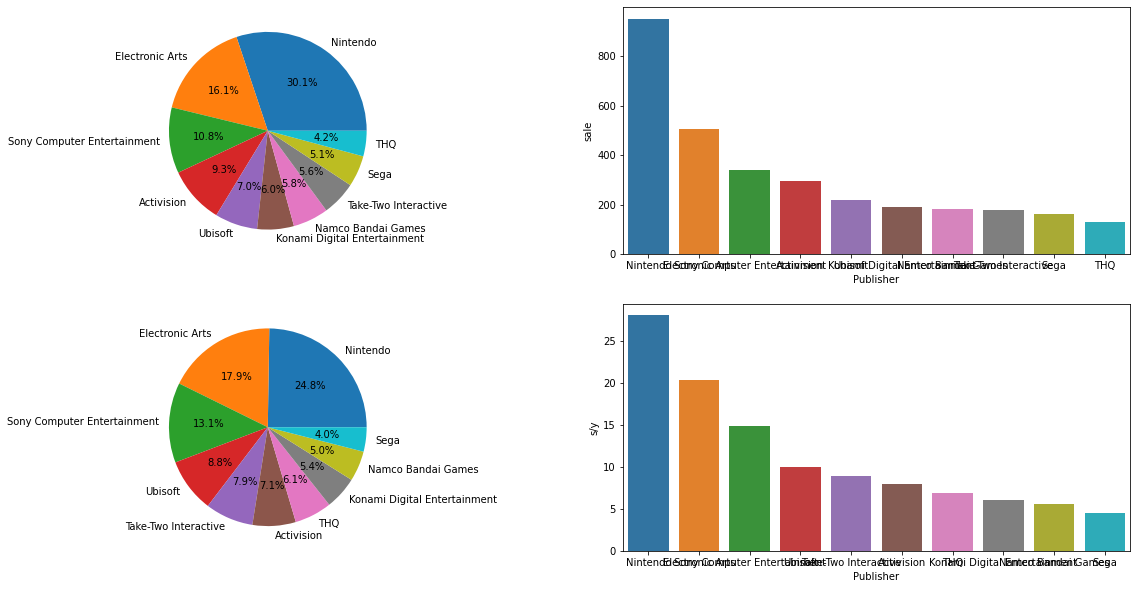

In [116]:
#게임산업 최대매출 기업, 년간 최대매출 기업
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,2,1)
plt.pie(ps['sale'],labels=ps.index, autopct='%.1f%%')
plt.subplot(2,2,2)
sns.barplot(ps.index,ps['sale'])

plt.subplot(2,2,3)
plt.pie(psy['s/y'],labels=psy.index, autopct='%.1f%%')
plt.subplot(2,2,4)
sns.barplot(psy.index,psy['s/y'])

#####년도별

In [181]:
'''
연도별 게임의 트렌드가 있을까
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함
'''
def yearing(x):
  if x <1990:
    return "1980~1990"
  elif x<1994:
    return "1990~1994"
  elif x<1998:
    return "1994~1998"
  elif x<2002:
    return "1998~2002"
  elif x<2006:
    return "2002~2006"
  elif x<2010:
    return "2006~2010"
  elif x<2014:
    return "2010~2014"
  elif x<2018:
    return "2014~2018"
  else:
    return "Error"
data=df_refind
data['Years']=data['Year'].apply(yearing)

data=data.groupby([data['Years'],data['Name'],data['Year'],data['Genre'],data['Publisher']]).sum()
data['sale']=data.iloc[:,-4:].sum(axis=1)
'''
nums=0
idd=data.reset_index()['Years'].unique()[nums]
print(idd)
data.loc[idd].sort_values(by=['sale'],ascending=False,axis=0).head(5)
'''

"\nnums=0\nidd=data.reset_index()['Years'].unique()[nums]\nprint(idd)\ndata.loc[idd].sort_values(by=['sale'],ascending=False,axis=0).head(5)\n"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

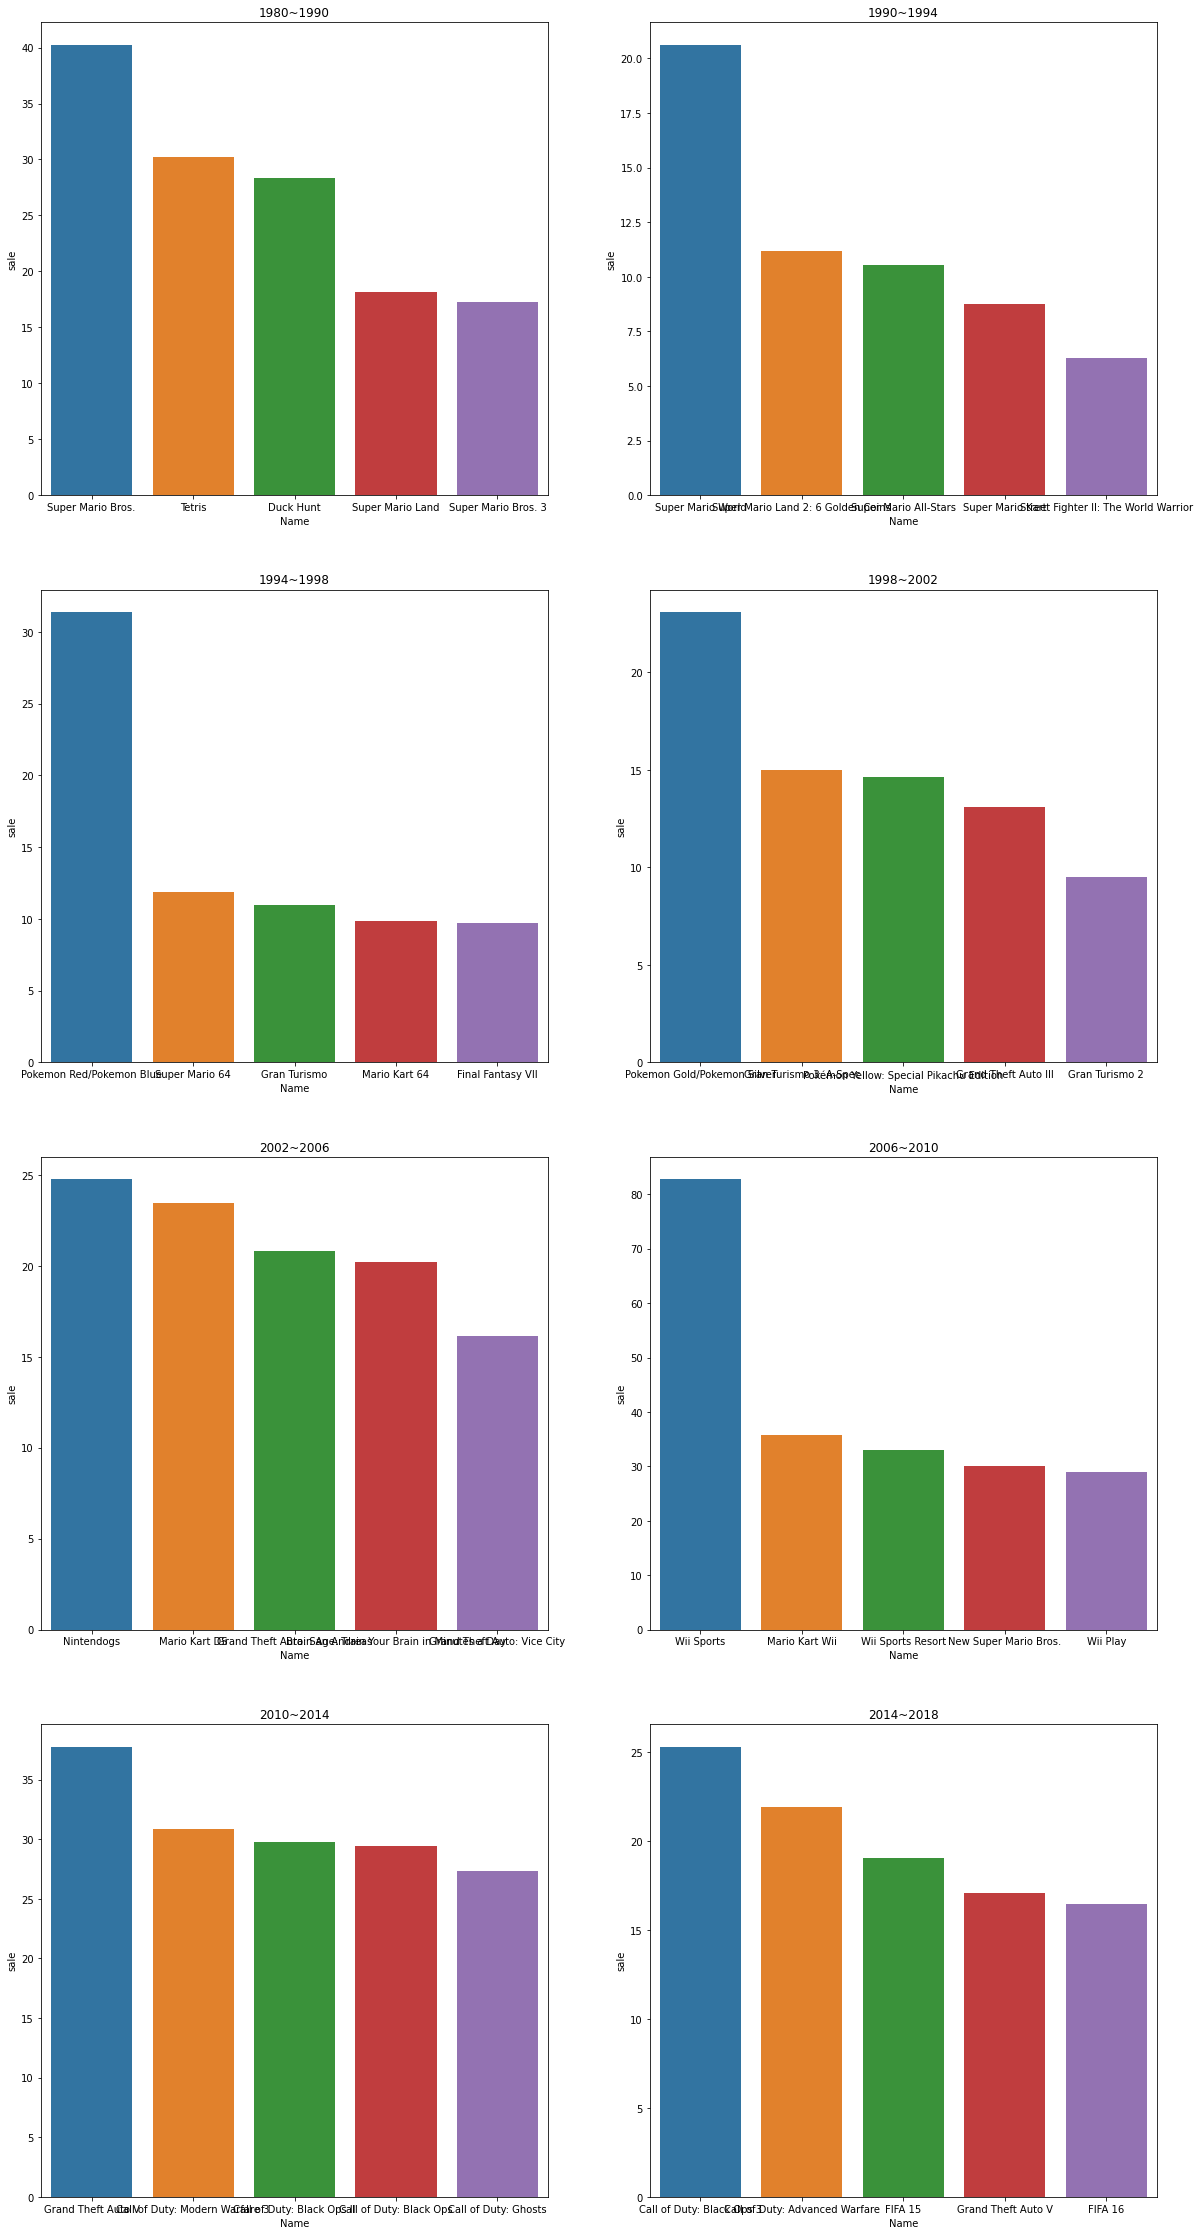

In [174]:
j=1
for i in data.reset_index()['Years'].unique():
  data2=data.loc[i].sort_values(by=['sale'],ascending=False,axis=0).head(5).reset_index()

  plt.rcParams["figure.figsize"] = (20,40)
  plt.subplot(4,2,j)
  sns.barplot(data2['Name'],data2['sale']).set_title(i)
  j=j+1

In [191]:
data=df_refind[df_refind['Genre']!='Platform']
data['Years']=data['Year'].apply(yearing)

data=data.groupby([data['Years'],data['Genre'],data['Publisher']]).sum()
data['sale']=data.iloc[:,-4:].sum(axis=1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year  ...  sale
Years     Genre    Publisher                            ...      
1980~1990 Action   20th Century Fox Video Games   7926  ...  1.71
                   Activision                    23805  ...  4.63
                   Answer Software                1982  ...  0.50
                   Atari                         25766  ...  7.67
                   Avalon Interactive             1982  ...  0.16
...                                                ...  ...   ...
2014~2018 Strategy Sega                           4031  ...  0.35
                   Take-Two Interactive          12092  ...  0.69
                   Tecmo Koei                    12087  ...  0.24
                   Ubisoft                        4030  ...  0.33
                   Unknown                        2015  ...  0.01

[3161 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

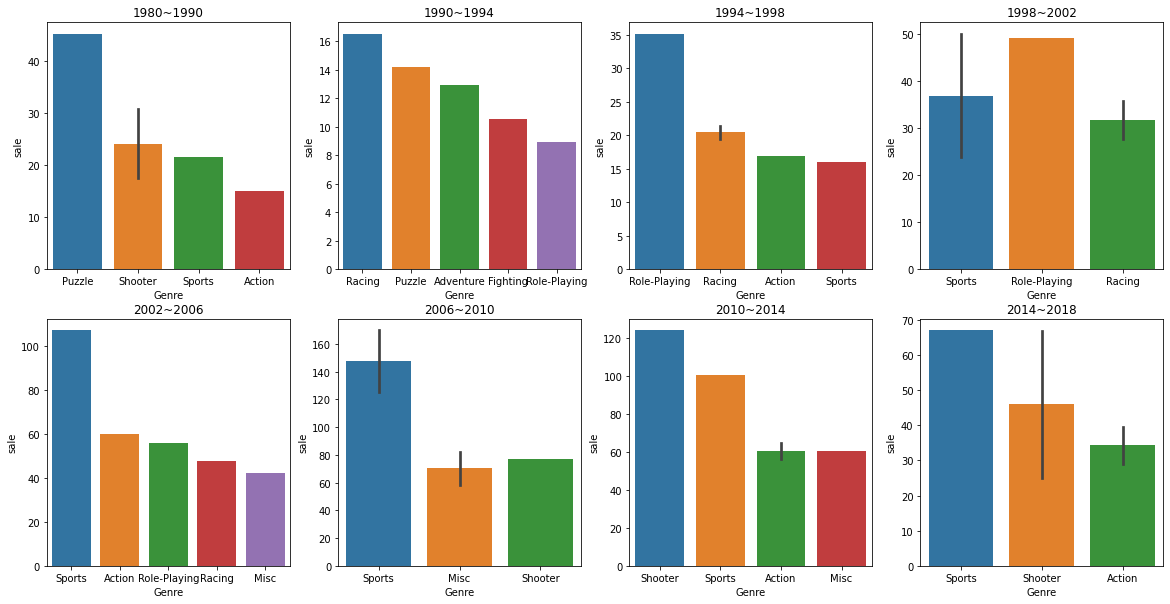

In [195]:
j=1
for i in data.reset_index()['Years'].unique():
  data2=data.loc[i].sort_values(by=['sale'],ascending=False,axis=0).head(5).reset_index()
  plt.rcParams["figure.figsize"] = (20,10)
  plt.subplot(2,4,j)
  sns.barplot(data2['Genre'],data2['sale']).set_title(i)
  j=j+1

  

